load and explore the data

In [3]:
import pandas as pd
sf=pd.read_csv("/content/GlobalLandTemperaturesByCity.csv")
print(sf.head())#display first few rows
print(sf.info())#checks data types and missing values

           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241023 entries, 0 to 7241022
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                

In [6]:
print(sf.isnull().sum())#count missing values per column
#isnull() refers to true for missing values and false for non missing values
#sum() counts true value column wise

dt                                    0
AverageTemperature               319681
AverageTemperatureUncertainty    319681
City                                  0
Country                               1
Latitude                              1
Longitude                             1
dtype: int64


data cleaning

In [7]:
sf['dt'] = pd.to_datetime(sf['dt'])


In [9]:
sf = sf.dropna()#drop missing values


In [10]:
city_name = "New Delhi"  # Change to any city you like
city_sf = sf[sf['City'] == city_name]
print(city_sf.head())


                dt  AverageTemperature  AverageTemperatureUncertainty  \
5195054 1796-01-01              14.590                          2.374   
5195055 1796-02-01              17.109                          1.940   
5195056 1796-03-01              21.454                          2.608   
5195057 1796-04-01              28.715                          2.122   
5195058 1796-05-01              33.726                          1.997   

              City Country Latitude Longitude  
5195054  New Delhi   India   28.13N    77.27E  
5195055  New Delhi   India   28.13N    77.27E  
5195056  New Delhi   India   28.13N    77.27E  
5195057  New Delhi   India   28.13N    77.27E  
5195058  New Delhi   India   28.13N    77.27E  


data visulaisation


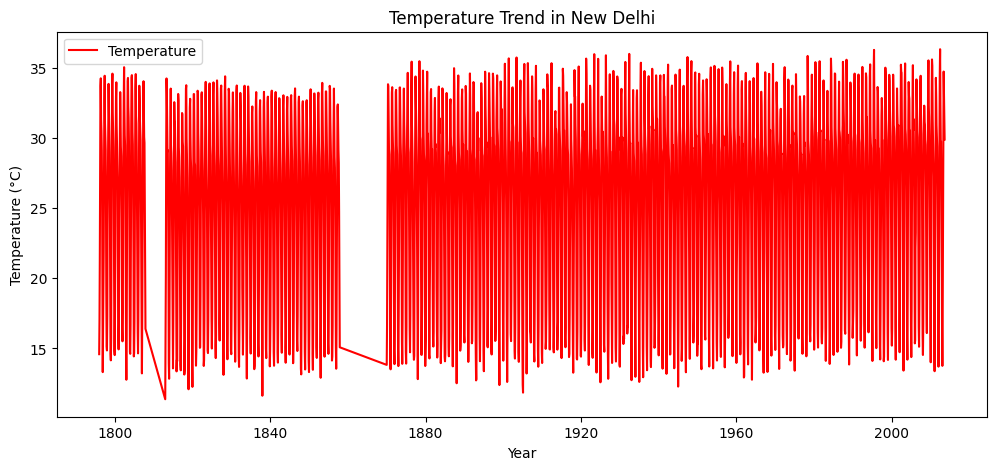

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(city_sf['dt'], city_sf['AverageTemperature'], color='red', label="Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature Trend in {city_name}")
plt.legend()
plt.show()


<ipython-input-14-69b81e42cbe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_sf['Rolling_Avg'] = city_sf['AverageTemperature'].rolling(window=12).mean()


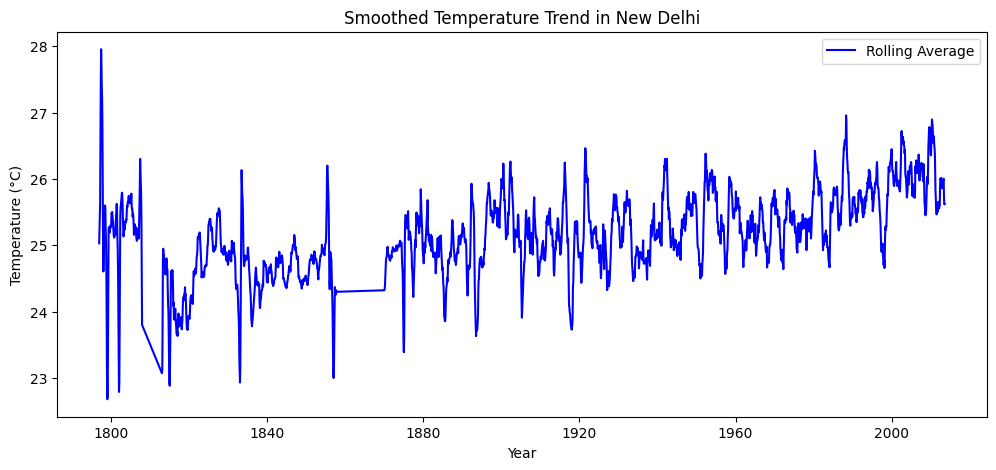

In [14]:
city_sf['Rolling_Avg'] = city_sf['AverageTemperature'].rolling(window=12).mean()

plt.figure(figsize=(12, 5))
plt.plot(city_sf['dt'], city_sf['Rolling_Avg'], color='blue', label="Rolling Average")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title(f"Smoothed Temperature Trend in {city_name}")
plt.legend()
plt.show()


<ipython-input-16-b633dce03ed7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_sf['Month'] = city_sf['dt'].dt.month
<ipython-input-16-b633dce03ed7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=city_sf['Month'], y=city_sf['AverageTemperature'], palette="coolwarm")


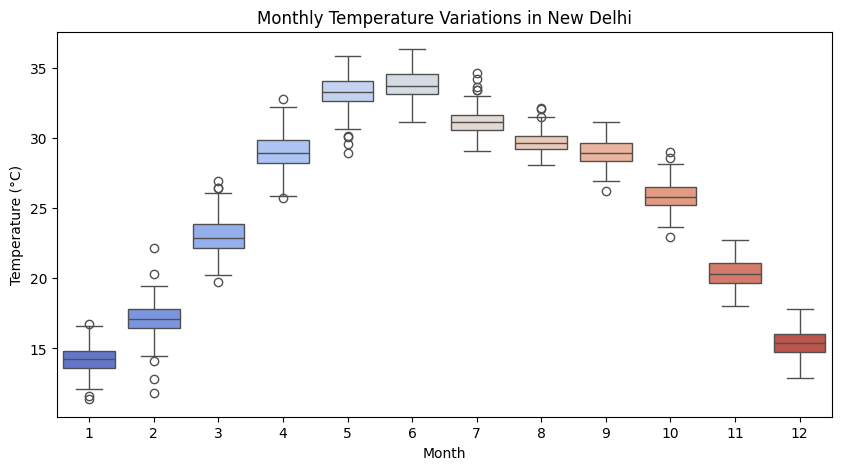

In [16]:
import seaborn as sns

city_sf['Month'] = city_sf['dt'].dt.month

plt.figure(figsize=(10, 5))
sns.boxplot(x=city_sf['Month'], y=city_sf['AverageTemperature'], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title(f"Monthly Temperature Variations in {city_name}")
plt.show()
